<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl.png">


<br><br><center><h1 style="font-size:2em;color:#2467C0"> Cambio de perspectiva  </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/cartas.jpg" align="middle" style="width:550px;"/></td>
<td>

En esta lección aplicaremos funciones de **OpenCV** para llevar a cabo transformaciones geométricas, con el objetivo de cambiar la perspectiva de un conductor de automóvil a la vista aérea y de esta manera tener una mejor comprensión del camino.
   
<br>
</td>
</tr>
</table>

# 0. Librerías básicas

In [89]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd

# Actividad 1


Tomar una foto a la carta que el profesor le proporcionará (asegurarse de que la foto tenga una perspectiva como la del ejemplo), descargarla y cambiarle el nombre a "carta.jpg".

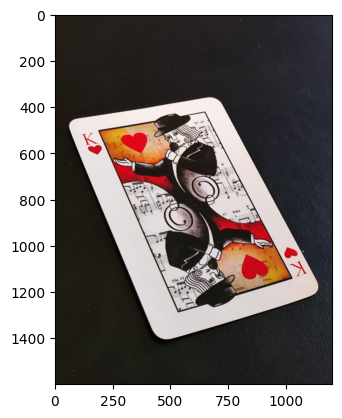

In [90]:
#Obtenga la imagen de la carta asignada por el profesor, 
#El nombre de la variable para guardar la imagen origina de la carta será "img"
img = cv.imread('figuras/carta.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # Convertir de BGR a RGB
plt.imshow(img)
plt.show()

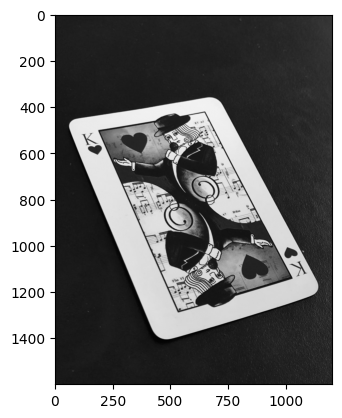

In [91]:
#Cambiar la imagen original a escala de grises, usar la variable img_gris
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # Convertir a escala de grises
plt.imshow(img_gris , cmap='gray')
plt.show()

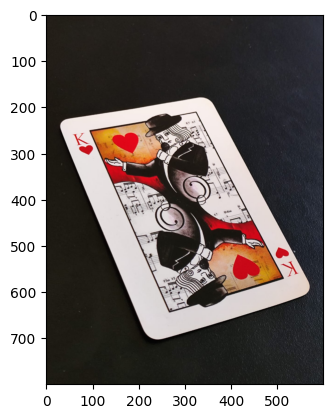

In [92]:
#Cambiar la imagen original a la mitad de tamaño, usar la variable img_mitad
fraccion = 0.5 # Fracción del tamaño original
alto = int(img.shape[0] * fraccion) # Calcular el nuevo alto [0] son las filas
ancho = int(img.shape[1] * fraccion) # Calcular el nuevo ancho [1] son las columnas
img_mitad = cv.resize(img, (ancho, alto), interpolation=cv.INTER_NEAREST) # yRedimensionar la imagen a 600x400

plt.imshow(img_mitad)
plt.show()

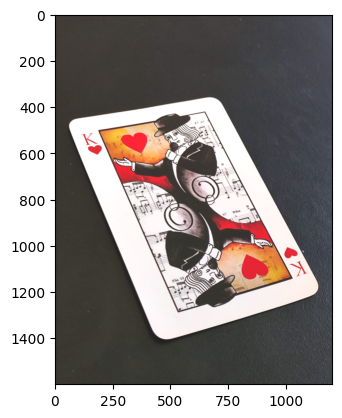

In [93]:
#Tomando la imagen original, aumentar la intensidad de la imagen (30 unidades), usar la variable img_a30
M = np.ones(img.shape, dtype = "uint8") * 30
img_a30 = cv.add(img, M)
plt.imshow(img_a30)
plt.show()

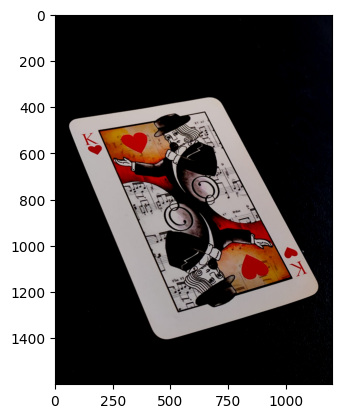

In [94]:
#Tomando la imagen original,disminuir la intensidad de la imagen (45 unidades), usar la variable img_m45
M = np.ones(img.shape, dtype = "uint8") * 45
img_m45 = cv.subtract(img, M)
plt.imshow(img_m45)
plt.show()

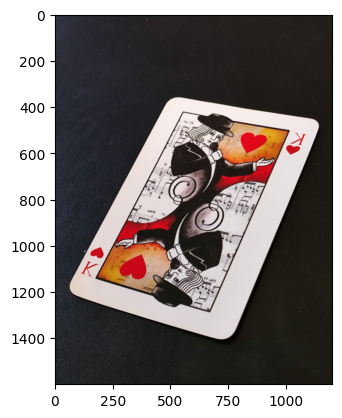

In [95]:
#Rotar la imagen original con efecto espejo, usar la variable img_espejo
img_espejo = cv.flip(img, 1) # 1 para espejo horizontal
plt.imshow(img_espejo)
plt.show()

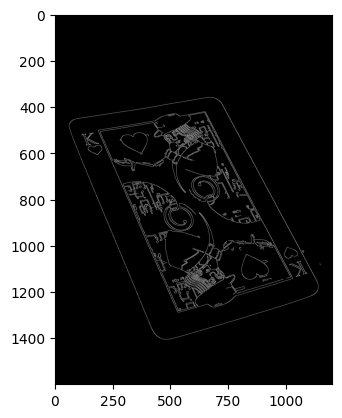

In [96]:
#Tomando la imagen img_gris aplicar el Filtro Gaussiano + la detección de Bordes con Canny
img_gauss = cv.GaussianBlur(img_gris,(3,3),0) # Aplicar filtro gaussiano resaltar bordes
img_borders_gauss = cv.Canny(img_gauss, 100, 250) # Aplicar Canny con umbrales 100 y 200
plt.imshow(img_borders_gauss, cmap='gray')
plt.show()

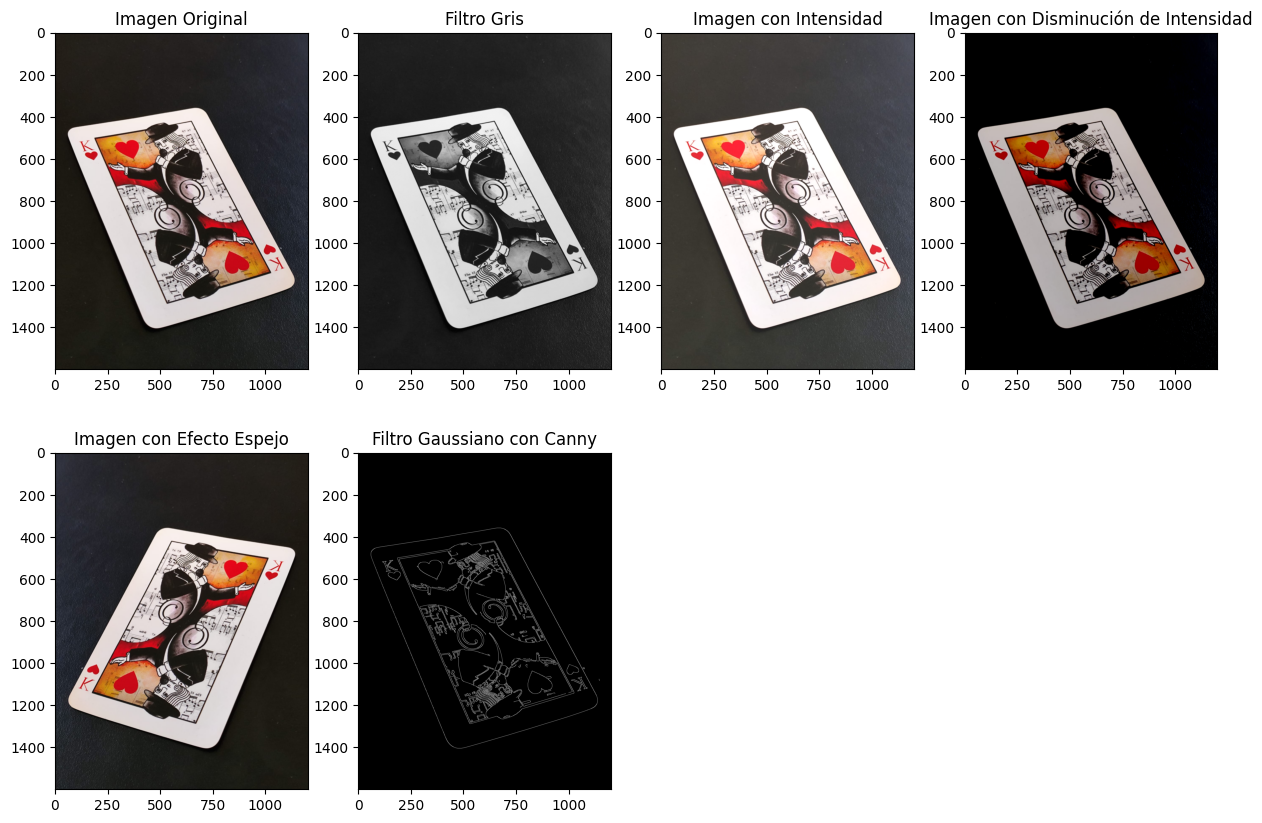

In [97]:
#Mostrar todas las transformaciones 
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
plt.title('Imagen Original')
plt.imshow(img , cmap='gray')

plt.subplot(2,4,2)
plt.title('Filtro Gris')
plt.imshow(img_gris , cmap='gray')

plt.subplot(2,4,3)
plt.title('Imagen con Intensidad')
plt.imshow(img_a30 , cmap='gray')

plt.subplot(2,4,4)
plt.title('Imagen con Disminución de Intensidad')
plt.imshow(img_m45 , cmap='gray')

plt.subplot(2,4,5)
plt.title('Imagen con Efecto Espejo')
plt.imshow(img_espejo , cmap='gray')

plt.subplot(2,4,6)
plt.title('Filtro Gaussiano con Canny')
plt.imshow(img_borders_gauss , cmap='gray')
plt.show()

# Actividad 2

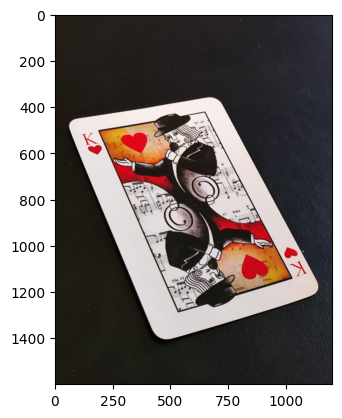

In [98]:
#Obtenga la imagen de la carta asignada por el profesor
#El nombre de la variable para guardar la imagen origina de la carta será "img"
img = cv.imread('figuras/carta.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # Convertir de BGR a RGB
plt.imshow(img)
plt.show()

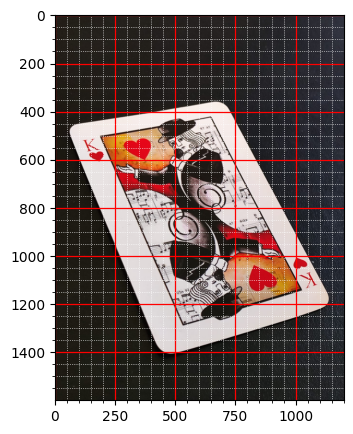

In [99]:
#Ampliar y mejorar la visibilidad del plano cartesiano
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(img)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.9', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='white')



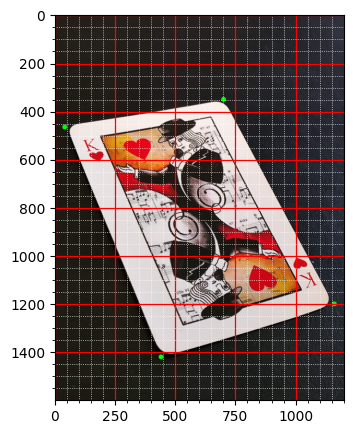

In [100]:
#Puntos de las esquinas
p1 = (40, 465)
p2 = (700, 350)
p3 = (440, 1420)
p4 = (1160, 1200)

img = cv.imread('figuras/carta.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

fig,ax = plt.subplots(figsize=(5,5))
cv.circle(img, p1, 10, (0,255,0), - 1)
cv.circle(img, p2, 10, (0,255,0), - 1)
cv.circle(img, p3, 10, (0,255,0), - 1)
cv.circle(img, p4, 10, (0,255,0), - 1)
ax.imshow(img)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.9', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='white')


In [101]:
#Obteniendo la matriz de transformación y cambiando de perspectiva
altura = 400
ancho = 280

pts1=np.float32( [  p1, p2, p3, p4  ]  )
pts2=np.float32([[0,0],[ancho,0],[0,altura],[ancho, altura]])

m_transformer=cv.getPerspectiveTransform(pts1,pts2 )
img_nueva_perspectiva=cv.warpPerspective( img,m_transformer,(ancho,altura))

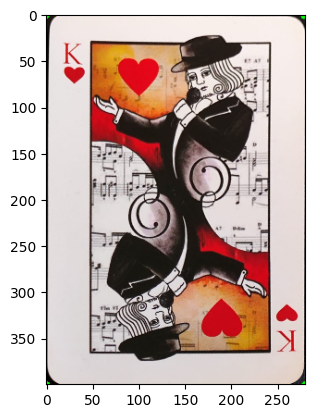

In [102]:
#Imagen con cambio de perspectiva 
plt.imshow(img_nueva_perspectiva)
plt.show()

### Resultado final

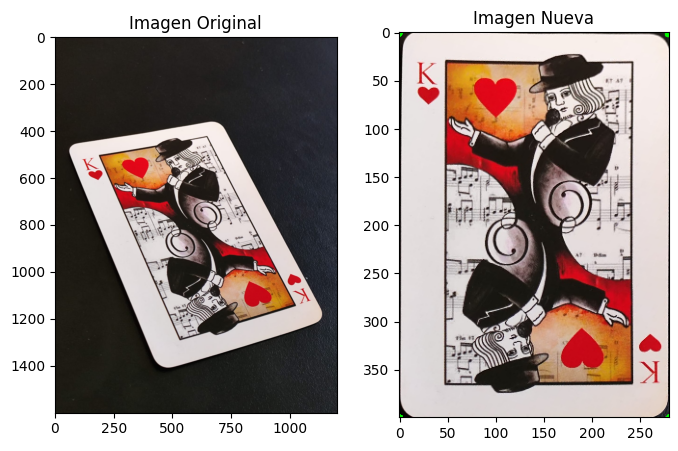

In [103]:
# Mostrar la imagen original y la que tiene el cambio  de perspectiva 
img = cv.imread('figuras/carta.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title('Imagen Original')
plt.imshow(img)

plt.subplot(1,2,2)
plt.title('Imagen Nueva')
plt.imshow(img_nueva_perspectiva)

plt.show()